In [2]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
# https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [5]:
download = False # True #False
trainset = datasets.MNIST('./mnist_data/train', download=download, train=True, transform=transform)
valset = datasets.MNIST('./mnist_data/val', download=download, train=False, transform=transform)

In [6]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


### 

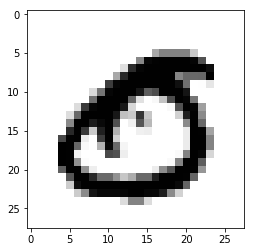

In [10]:
plt.imshow(images[63].numpy().squeeze(), cmap='gray_r');

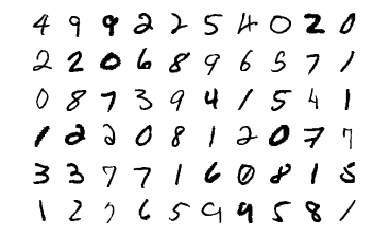

In [11]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [45]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [30]:
# Showing How convolutions work
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
val_loader   = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [26]:
# Hyperparameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [48]:
model = ConvNet()
# Loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [39]:
model

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=3136, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=10, bias=True)
)

In [40]:
total_step = len(train_loader)

In [41]:
total_step

938

In [33]:
938*64

60032

In [49]:
# Train the model
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Run the forward pass
        #print(images.shape)
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

Epoch [1/5], Step [100/938], Loss: 0.1637, Accuracy: 95.31%
Epoch [1/5], Step [200/938], Loss: 0.1802, Accuracy: 92.19%
Epoch [1/5], Step [300/938], Loss: 0.2468, Accuracy: 92.19%
Epoch [1/5], Step [400/938], Loss: 0.2116, Accuracy: 92.19%
Epoch [1/5], Step [500/938], Loss: 0.1499, Accuracy: 95.31%
Epoch [1/5], Step [600/938], Loss: 0.0957, Accuracy: 95.31%
Epoch [1/5], Step [700/938], Loss: 0.0933, Accuracy: 96.88%
Epoch [1/5], Step [800/938], Loss: 0.0751, Accuracy: 96.88%
Epoch [1/5], Step [900/938], Loss: 0.1216, Accuracy: 96.88%
Epoch [2/5], Step [100/938], Loss: 0.0351, Accuracy: 100.00%
Epoch [2/5], Step [200/938], Loss: 0.0482, Accuracy: 98.44%
Epoch [2/5], Step [300/938], Loss: 0.0399, Accuracy: 100.00%
Epoch [2/5], Step [400/938], Loss: 0.0685, Accuracy: 98.44%
Epoch [2/5], Step [500/938], Loss: 0.1746, Accuracy: 92.19%
Epoch [2/5], Step [600/938], Loss: 0.1039, Accuracy: 96.88%
Epoch [2/5], Step [700/938], Loss: 0.0698, Accuracy: 96.88%
Epoch [2/5], Step [800/938], Loss: 0.0

KeyboardInterrupt: 

In [53]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 10)
        #self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        #x = F.relu(self.fc1(x))
        x = (self.fc1(x))
        #x = self.fc2(x)
        return F.log_softmax(x, dim=1)
net2 = Net2()
print(net2)

Net2(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=10, bias=True)
)


In [54]:
# Train the model
#total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Run the forward pass
        #print(images.shape)
        outputs = net2(images)
        loss = loss_function(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

Epoch [1/5], Step [100/938], Loss: 2.3110, Accuracy: 6.25%
Epoch [1/5], Step [200/938], Loss: 2.2861, Accuracy: 10.94%
Epoch [1/5], Step [300/938], Loss: 2.3116, Accuracy: 10.94%
Epoch [1/5], Step [400/938], Loss: 2.3245, Accuracy: 10.94%
Epoch [1/5], Step [500/938], Loss: 2.3467, Accuracy: 4.69%
Epoch [1/5], Step [600/938], Loss: 2.3566, Accuracy: 1.56%
Epoch [1/5], Step [700/938], Loss: 2.3171, Accuracy: 6.25%
Epoch [1/5], Step [800/938], Loss: 2.2878, Accuracy: 17.19%
Epoch [1/5], Step [900/938], Loss: 2.3189, Accuracy: 9.38%
Epoch [2/5], Step [100/938], Loss: 2.3138, Accuracy: 9.38%
Epoch [2/5], Step [200/938], Loss: 2.3328, Accuracy: 7.81%
Epoch [2/5], Step [300/938], Loss: 2.3177, Accuracy: 9.38%
Epoch [2/5], Step [400/938], Loss: 2.3248, Accuracy: 6.25%
Epoch [2/5], Step [500/938], Loss: 2.3155, Accuracy: 12.50%
Epoch [2/5], Step [600/938], Loss: 2.3205, Accuracy: 12.50%
Epoch [2/5], Step [700/938], Loss: 2.3359, Accuracy: 3.12%
Epoch [2/5], Step [800/938], Loss: 2.3237, Accurac